# Malignant-Comments-Classifier Project

# Problem Statement

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.

# Data Set Description

The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 
The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   
The data set includes:
-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID: It includes unique Ids associated with each comment text given.   
-	Comment text: This column contains the comments extracted from various social media platforms. 

This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available. 
You need to build a model that can differentiate between comments and its categories.

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
from collections import Counter

from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk import pos_tag

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None) # Display all the columns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
# Let's have a look at top 5 rows
df.head(15)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [4]:
# Similarly, reading test dataset
df_test=pd.read_csv('test.csv')
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [5]:
#Multilabel vs Multiclass classification ?

#In multi-class classification, the data can belong to only one label out of all the labels we have. For example, a given picture of a animal may be an cat, dog or elephant only and not a combination of these.

#In multi-label classification, data can belong to more than one label simultaneously. For example, in our case a comment may be malignant, threat or loathe at the same time. It may also happen that the comment is positive/neutral and hence does not belong to any of the six labels.

#This is therefore a multi-label classification problem.

In [6]:
df.shape

(159571, 8)

In [7]:
df_test.shape

(153164, 2)

<AxesSubplot:>

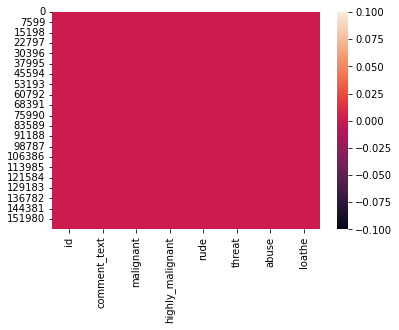

In [8]:
#Checking for null values
sns.heatmap(df.isnull())

In [9]:
# Dropping 'id' to reduce unnecessary feature
df.drop(['id'],axis=1,inplace=True)

In [10]:
df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   comment_text      159571 non-null  object
 1   malignant         159571 non-null  int64 
 2   highly_malignant  159571 non-null  int64 
 3   rude              159571 non-null  int64 
 4   threat            159571 non-null  int64 
 5   abuse             159571 non-null  int64 
 6   loathe            159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


# EDA

In [12]:
# Let's have a look at the count plots of individual Categories.

categories=df.columns[1:]

In [13]:
categories

Index(['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe'], dtype='object')

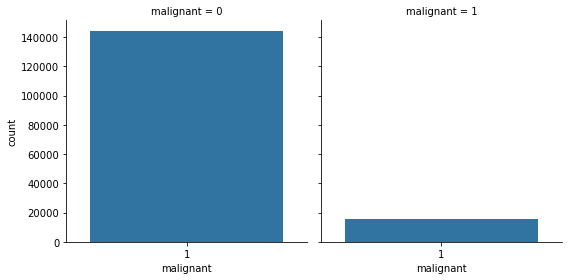

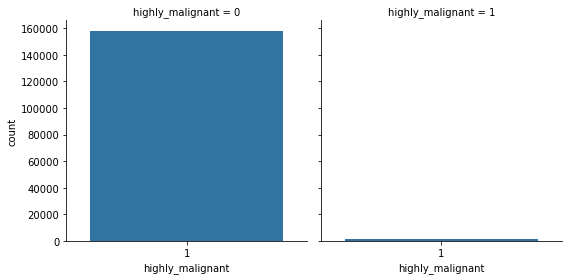

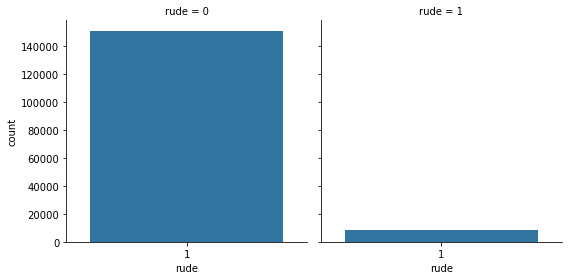

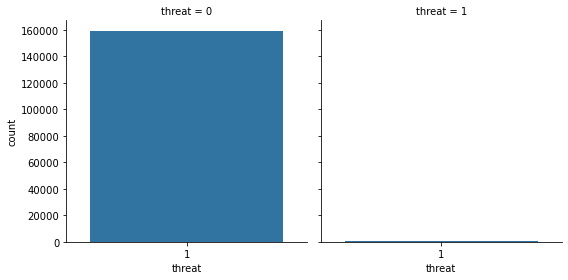

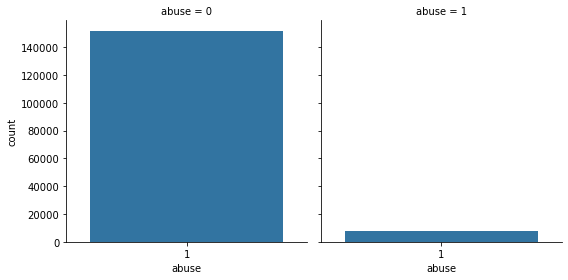

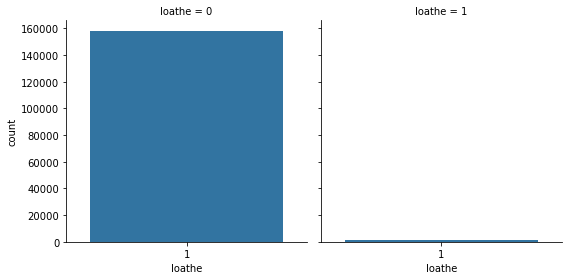

In [14]:
for col in categories:
    g = sns.FacetGrid(df, col=col,size=4)
    g.map(sns.countplot, col)
    plt.show()

While maximum Categories belong to Malignant, a lot of comments are abusive and rude as well; while threat comments are the minimum

In [15]:
# Verifying above statement
counts=df.iloc[:,1:].sum()
counts

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

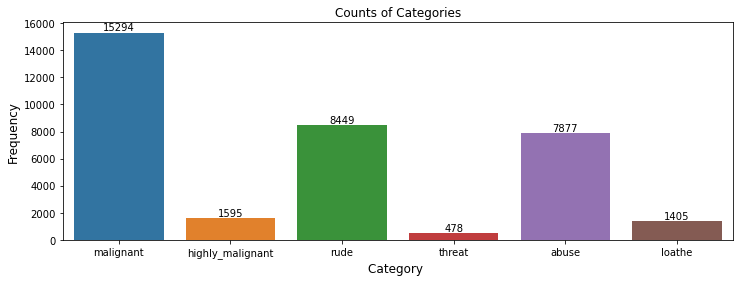

In [16]:
# Let's plot the counts of each category

plt.figure(figsize=(12,4))
ax = sns.barplot(counts.index, counts.values)
plt.title("Counts of Categories")
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Category ', fontsize=12)
rects = ax.patches
labels = counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [17]:
# I want to know the percent of columns which are neither of the defined categories

none = df[(df['malignant']!=1) & (df['highly_malignant']!=1) & (df['rude']!=1) & 
                            (df['threat']!=1) & (df['abuse']!=1) & (df['loathe']!=1)]
percent=len(none)/len(df)*100
print('Percentage of good/neutral comments = ',percent)
print('Percentage of negative comments = ', (100-percent))

Percentage of good/neutral comments =  89.83211235124176
Percentage of negative comments =  10.167887648758239


<AxesSubplot:>

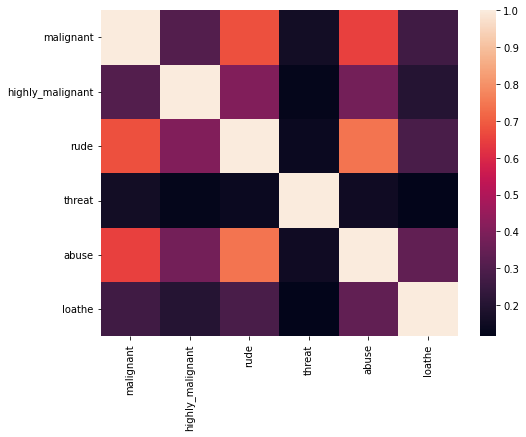

In [18]:
# Let's view the Correlation heatmap among variables
plt.figure(figsize=(8,6))
sns.heatmap(df.corr())

In [19]:
# Adding new feature comment_length to store length of characters
df['comment_length'] = df['comment_text'].apply(lambda x: len(str(x)))
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment_length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


Train Data


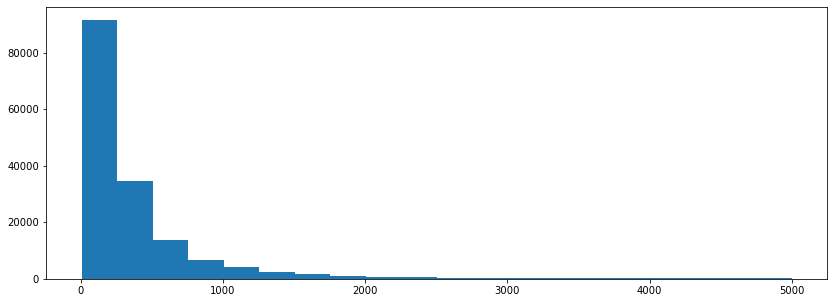

In [20]:
print("Train Data")
plt.figure(figsize=(14,5))
plt.hist(df['comment_length'],bins=20)
plt.show()

In the train data, the maximum character lengths are between 0-250, then the frequency reduces as the number of characters increase

In [21]:
# Similarly for test data
df_test['comment_length'] = df_test['comment_text'].apply(lambda x: len(str(x)))
df_test.head()

,id,comment_text,comment_length
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,00017563c3f7919a,":If you have a look back at the source, the in...",205
4,00017695ad8997eb,I don't anonymously edit articles at all.,41


Test Data


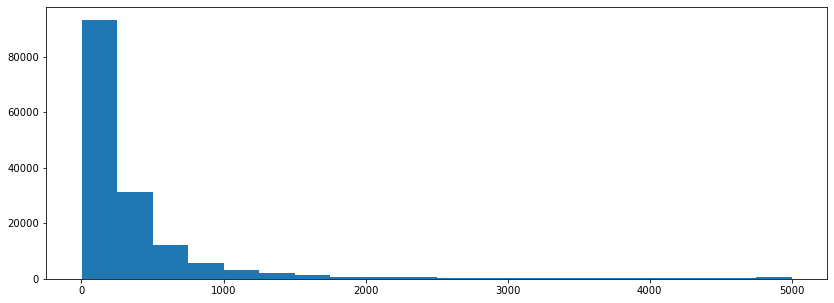

In [22]:
print("Test Data")
plt.figure(figsize=(14,5))
plt.hist(df_test['comment_length'],bins=20)
plt.show()

Similar to the train data, here also the maximum character lengths are between 0-250, then the frequency reduces as the number of characters increase

# New Feature: Comment Label

# Comment_label 1: Negative Comment
# Comment_label 0: Neutral/Positive Comment

In [23]:
# Creating a new feature having Negative Comments and Non-Negative Comments.
df['Comment_label'] = df[categories].max(axis=1)
df.head(15)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment_length,Comment_label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,65,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44,1
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,115,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,472,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,70,0


0    143346
1     16225
Name: Comment_label, dtype: int64

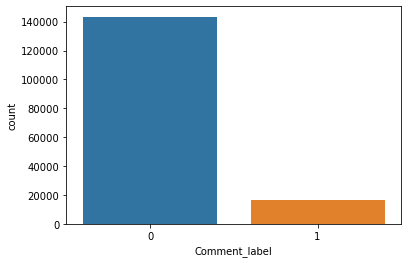

In [24]:
sns.countplot(df['Comment_label'])
# Verifying above statement
df['Comment_label'].value_counts()

In [25]:
df['comment_text'][10]

'"\nFair use rationale for Image:Wonju.jpg\n\nThanks for uploading Image:Wonju.jpg. I notice the image page specifies that the image is being used under fair use but there is no explanation or rationale as to why its use in Wikipedia articles constitutes fair use. In addition to the boilerplate fair use template, you must also write out on the image description page a specific explanation or rationale for why using this image in each article is consistent with fair use.\n\nPlease go to the image description page and edit it to include a fair use rationale.\n\nIf you have uploaded other fair use media, consider checking that you have specified the fair use rationale on those pages too. You can find a list of \'image\' pages you have edited by clicking on the ""my contributions"" link (it is located at the very top of any Wikipedia page when you are logged in), and then selecting ""Image"" from the dropdown box. Note that any fair use images uploaded after 4 May, 2006, and lacking such a

# Pre-processing the comments for faster and accurate predictions
The comments need to be modified before we can use them for modelling

In [26]:
# Fuction to remove short words
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [27]:
# function to filter using POS tagging. This will be called inside the below function
def get_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Function for data cleaning.
def Processed_data(comments):
    # Replace email addresses with 'email'
    comments=re.sub(r'^.+@[^\.].*\.[a-z]{2,}$',' ', comments)
        
    # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    comments=re.sub(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',' ',comments)
        
    # getting only words(i.e removing all the special characters)
    comments = re.sub(r'[^\w]', ' ', comments) 
        
    # getting only words(i.e removing all the" _ ")
    comments = re.sub(r'[\_]', ' ', comments) 
    
    # getting rid of unwanted characters(i.e remove all the single characters left)
    comments=re.sub(r'\s+[a-zA-Z]\s+', ' ', comments)
     # Removing extra whitespaces
    comments=re.sub(r'\s+', ' ', comments, flags=re.I)

    #converting all the letters of the review into lowercase
    comments = comments.lower()
    
    # splitting every words from the sentences
    comments = comments.split()

    # iterating through each words and checking if they are stopwords or not,
    comments=[word for word in comments if not word in set(STOPWORDS)]
    
    # remove empty tokens
    comments = [text for text in comments if len(text) > 0]
    
    # getting pos tag text
    pos_tags = pos_tag(comments)

    # considering words having length more than 3only
    comments = [text for text in comments if len(text) > 3]        
   
    # performing lemmatization operation and passing the word in get_pos function to get filtered using POS
    comments = [(WordNetLemmatizer().lemmatize(text[0], get_pos(text[1])))for text in pos_tags]

   # considering words having length more than 3 only
    comments = [text for text in comments if len(text) > 3]
    comments = ' '.join(comments)
    return comments

In [28]:
# Replacing short words with actual words
df['comment_text'] = df['comment_text'].map(lambda comments : clean_text(comments))
df_test['comment_text'] = df_test['comment_text'].map(lambda comments : clean_text(comments))

In [29]:
import nltk

In [30]:
# Download stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\anshul
[nltk_data]     dubey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
# Download WordNet (lexical database for English language)
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\anshul
[nltk_data]     dubey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\anshul dubey\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [33]:
# cleaning the comments and storing them in a separate feature.
df["clean_comment_text"] = df["comment_text"].apply(lambda x: Processed_data(x))

In [34]:
df_test["clean_comment_text"] = df_test["comment_text"].apply(lambda x: Processed_data(x))

In [35]:
# Adding new feature clean_comment_length to store length of characters
df['clean_comment_length'] = df['clean_comment_text'].apply(lambda x: len(str(x)))
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment_length,Comment_label,clean_comment_text,clean_comment_length
0,explanation why the edits made under my userna...,0,0,0,0,0,0,264,0,explanation edits username hardcore metallica ...,123
1,d aww he matches this background colour i am s...,0,0,0,0,0,0,112,0,match background colour seemingly stuck thanks...,64
2,hey man i am really not trying to edit war it ...,0,0,0,0,0,0,233,0,trying edit constantly removing relevant infor...,112
3,more i cannot make any real suggestions on imp...,0,0,0,0,0,0,622,0,real suggestion improvement wondered section s...,315
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,67,0,hero chance remember page,25


In [36]:
# Adding new feature clean_comment_length to store length of characters
df_test['clean_comment_length'] = df_test['clean_comment_text'].apply(lambda x: len(str(x)))
df_test.head()

,id,comment_text,comment_length,clean_comment_text,clean_comment_length
0,00001cee341fdb12,yo bitch ja rule is more succesful then you wi...,367,bitch rule succesful whats hating mofuckas bit...,184
1,0000247867823ef7,from rfc the title is fine as it is imo,50,title fine,10
2,00013b17ad220c46,sources zawe ashton on lapland,54,source zawe ashton lapland,26
3,00017563c3f7919a,if you have a look back at the source the info...,205,look source information updated correct form g...,104
4,00017695ad8997eb,i do not anonymously edit articles at all,41,anonymously edit article,24


# Before- Pre-processing

In [37]:
#for counting frequently occurence of Negative and Non negative words.
count1 = Counter(" ".join(df[df['Comment_label']==1]["comment_text"]).split()).most_common(10)
count2 = Counter(" ".join(df[df['Comment_label']==0]["comment_text"]).split()).most_common(10)
dataframe=pd.DataFrame()
print("TOP 10 Words in Each Category (Word,Counts)")
dataframe['Most Frequent Words in Negative Comments']=count1
dataframe['Most Frequent Words in Non negative Comments']=count2
dataframe

TOP 10 Words in Each Category (Word,Counts)


,Most Frequent Words in Negative Comments,Most Frequent Words in Non negative Comments
0,"(you, 40696)","(the, 473751)"
1,"(i, 25081)","(to, 279836)"
2,"(the, 23045)","(i, 215325)"
3,"(a, 22172)","(of, 211867)"
4,"(to, 17572)","(and, 206524)"
5,"(and, 17568)","(a, 193780)"
6,"(is, 14294)","(you, 177612)"
7,"(of, 12680)","(is, 167851)"
8,"(are, 11423)","(that, 151572)"
9,"(not, 10634)","(it, 139494)"


# After Pre-processing steps

In [38]:
#for counting frequently occurence of Negative and Non negative words.
count1 = Counter(" ".join(df[df['Comment_label']==1]["clean_comment_text"]).split()).most_common(10)
count2 = Counter(" ".join(df[df['Comment_label']==0]["clean_comment_text"]).split()).most_common(10)
dataframe=pd.DataFrame()
print("TOP 10 Words in Each Category (Word,Counts)")
dataframe['Most Frequent Words in Negative Comments']=count1
dataframe['Most Frequent Words in Non negative Comments']=count2
dataframe

TOP 10 Words in Each Category (Word,Counts)


,Most Frequent Words in Negative Comments,Most Frequent Words in Non negative Comments
0,"(fuck, 10080)","(article, 72349)"
1,"(suck, 4696)","(page, 54390)"
2,"(wikipedia, 3939)","(wikipedia, 44662)"
3,"(like, 3937)","(talk, 36421)"
4,"(shit, 3707)","(like, 24494)"
5,"(nigger, 3434)","(source, 21257)"
6,"(fucking, 3337)","(think, 19270)"
7,"(page, 2870)","(time, 17841)"
8,"(hate, 2713)","(know, 17689)"
9,"(faggot, 2496)","(edit, 17248)"


In [39]:
# Let's display the wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def Display_wordcloud(data,title):
    feedbackcloud = WordCloud(
        background_color = 'black',
        max_words = 1000,
        max_font_size = 40, 
        scale = 3,
        random_state = 25
    ).generate(str(data))

    fig = plt.figure(1, figsize = (15, 10),facecolor='g')
    plt.axis('off')
    plt.imshow(feedbackcloud)
    plt.title(f"{title} words")
    plt.show()

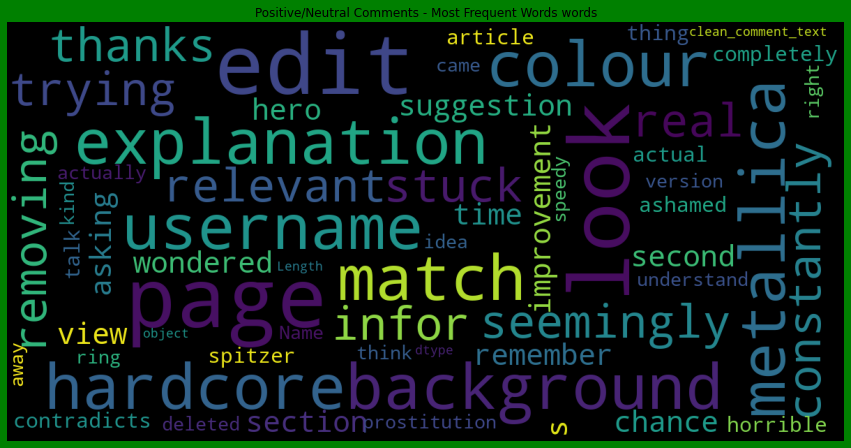

In [40]:
# Non-Negative Comments - Frequent words in training data
Display_wordcloud(df['clean_comment_text'][df['Comment_label']==0],"Positive/Neutral Comments - Most Frequent Words")

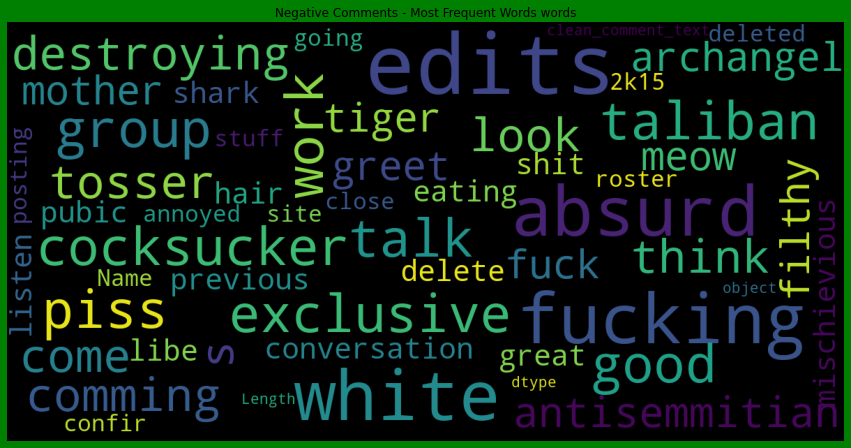

In [41]:
# Negative Comments - Frequent words in training data
Display_wordcloud(df['clean_comment_text'][df['Comment_label']==1],"Negative Comments - Most Frequent Words")

In [42]:
from nltk.tokenize import word_tokenize

In [43]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\anshul
[nltk_data]     dubey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
# Tokenizing
data=[]
from nltk.tokenize import word_tokenize
for j,i in enumerate(df['clean_comment_text']):
    a=word_tokenize(i,'english')
    data.append(a)

# Creating Word dictionary

In [45]:
dictionary = corpora.Dictionary(data)
print(dictionary)

Dictionary<167609 unique tokens: ['closure', 'doll', 'edits', 'explanation', 'hardcore']...>


In [46]:
# TF-IDF(term frequency–inverse document frequency) vectorizer
def Tf_idf_train(text):
    tfid = TfidfVectorizer(min_df=3,smooth_idf=False)
    return tfid.fit_transform(text)

In [47]:
# Let's define x, y for modelling
x=Tf_idf_train(df['clean_comment_text'])
x.shape

(159571, 43246)

In [48]:
# For y
y = df['Comment_label'].values
y.shape

(159571,)

# Model Building

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import log_loss

LR=LogisticRegression()
MNB=MultinomialNB()
PAC=PassiveAggressiveClassifier()
DT=DecisionTreeClassifier()
RFC=RandomForestClassifier()

In [50]:
models=[('LogisticRegression',LR),('MultinomialNB',MNB),('PassiveAggressiveClassifier',PAC),('DecisionTreeClassifier',DT),
        ('RandomForestClassifier',RFC)]

In [51]:
models

[('LogisticRegression', LogisticRegression()),
 ('MultinomialNB', MultinomialNB()),
 ('PassiveAggressiveClassifier', PassiveAggressiveClassifier()),
 ('DecisionTreeClassifier', DecisionTreeClassifier()),
 ('RandomForestClassifier', RandomForestClassifier())]

LogisticRegression
LogisticRegression()
Learning Score :  0.9578062471463487
Accuracy Score :  0.953125
Cross Val Score :  0.9640016550114889
roc auc score :  0.7921953066680771
Log loss :  1.619009302513781
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     43004
           1       0.92      0.59      0.72      4868

    accuracy                           0.95     47872
   macro avg       0.94      0.79      0.85     47872
weighted avg       0.95      0.95      0.95     47872



Confusion Matrix:
 [[42755   249]
 [ 1995  2873]]


MultinomialNB
MultinomialNB()
Learning Score :  0.9397845996830768
Accuracy Score :  0.9354946524064172
Cross Val Score :  0.9265902378998178
roc auc score :  0.688473877991285
Log loss :  2.2279368123856305
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97     43004
           1       0.97      0.38      0.54   

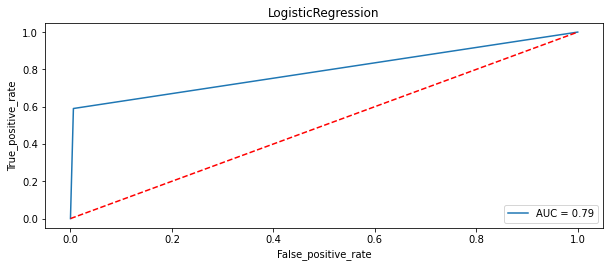

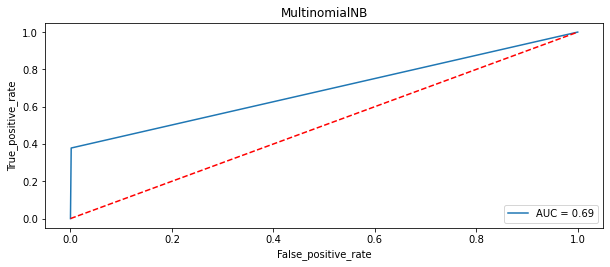

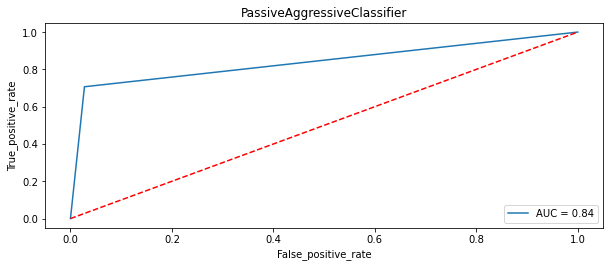

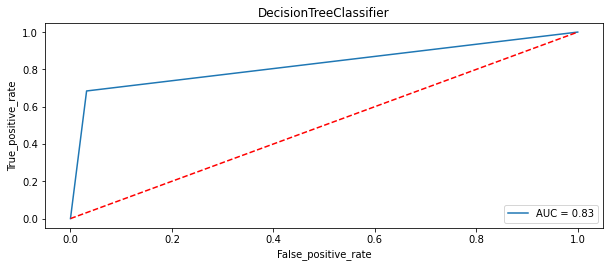

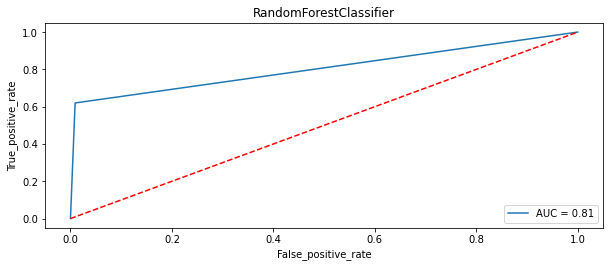

In [52]:
# Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score.

Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
lg_loss=[]

# For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print(name)
    Model.append(name)
    print(model)
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42,stratify=y)
    model.fit(x_train,y_train)
    
# Learning Score
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
    # Cross_val_score
    cv_score=cross_val_score(model,x,y,cv=5,scoring='roc_auc').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    
# Roc auc score
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)  

# Log Loss
    loss = log_loss(y_test,y_pred)
    print('Log loss : ', loss)
    lg_loss.append(loss)

# Classification Report     
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')

In [53]:
  # Displaying scores :
results=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,
                     'Auc_score':rocscore,'Log_Loss':lg_loss}) 
results

,Model,Learning Score,Accuracy Score,Cross Val Score,Auc_score,Log_Loss
0,LogisticRegression,95.780625,95.312500,96.400166,79.219531,1.619009
1,MultinomialNB,93.978460,93.549465,92.659024,68.847388,2.227937
2,PassiveAggressiveClassifier,98.975819,94.543783,93.404778,83.965278,1.884530
3,DecisionTreeClassifier,99.823633,93.933824,83.441577,82.623842,2.095206
4,RandomForestClassifier,99.821843,95.312500,95.448734,80.540260,1.619012


# Looking at all the Scores, I have selected Random Forest

# Hyperparameter Tuning - Random Forest

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.30,stratify=y)
parameters={'bootstrap': [True, False],
 'max_depth': [10, 50, 100, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 300, 500, 800, 1200]}


LG=LogisticRegression()


# Applying Randomized Search CV for hyperparameter tuning with scoring= "accuracy"
#rand = RandomizedSearchCV(estimator = RFC, param_distributions = parameters, 
#                          n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1,scoring='accuracy')
#rand.fit(x_train,y_train)
#rand.best_params_

In [57]:
LG=LogisticRegression()


In [58]:
RFC=RandomForestClassifier(n_estimators= 500,
                           min_samples_split= 2,
                           min_samples_leaf=1,
                           max_depth= 100,
                           bootstrap= False)

In [59]:
RFC.fit(x_train,y_train)
RFC.score(x_train,y_train)
pred=RFC.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,pred))
print('Log loss : ', log_loss(y_test,pred))
print('Confusion Matrix:',confusion_matrix(y_test,pred))
print('Classification Report:','\n',classification_report(y_test,pred))

Accuracy Score: 0.9262199197860963
Log loss :  2.5482742273968566
Confusion Matrix: [[42972    32]
 [ 3500  1368]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     43004
           1       0.98      0.28      0.44      4868

    accuracy                           0.93     47872
   macro avg       0.95      0.64      0.70     47872
weighted avg       0.93      0.93      0.91     47872



(2.5, -0.5)

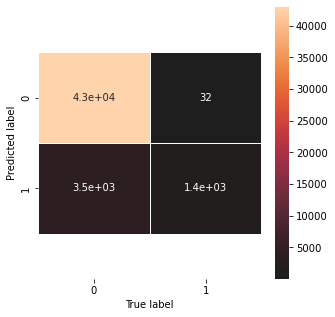

In [60]:
# Confusion matrix Visualization
fig, ax =plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, pred),annot=True,linewidths=1,center=0)
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Text(0.5, 1.0, 'Random Forest Classifier')

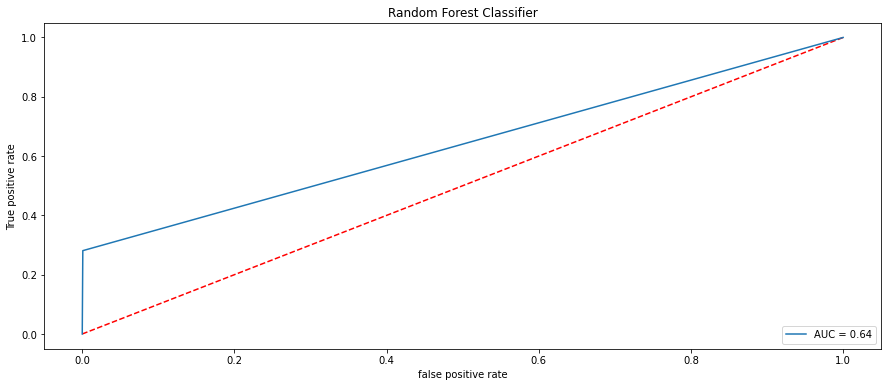

In [61]:
# Roc-Auc score
f,ax = plt.subplots(figsize = (15,6))
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, pred)
ax.plot([0,1],[0,1],'r--')
ax.plot(fpr,tpr,label='AUC = %0.2f'% roc_auc_score(y_test, pred))
ax.legend(loc='lower right')
ax.set_xlabel('false positive rate')
ax.set_ylabel('True positive rate')
ax.set_title('Random Forest Classifier')

In [62]:
def Tf_idf_test(text):
    tfid = TfidfVectorizer(max_features=43246,smooth_idf=False)
    return tfid.fit_transform(text)

# PREDICTION

In [63]:
x_testing_data=Tf_idf_test(df_test['clean_comment_text'])

In [64]:
x_testing_data.shape

(153164, 43246)

In [65]:
Prediction=RFC.predict(x_testing_data)
df_test['Predicted values']=Prediction
df_test

,id,comment_text,comment_length,clean_comment_text,clean_comment_length,Predicted values
0,00001cee341fdb12,yo bitch ja rule is more succesful then you wi...,367,bitch rule succesful whats hating mofuckas bit...,184,0
1,0000247867823ef7,from rfc the title is fine as it is imo,50,title fine,10,0
2,00013b17ad220c46,sources zawe ashton on lapland,54,source zawe ashton lapland,26,0
3,00017563c3f7919a,if you have a look back at the source the info...,205,look source information updated correct form g...,104,0
4,00017695ad8997eb,i do not anonymously edit articles at all,41,anonymously edit article,24,0
...,...,...,...,...,...,...
153159,fffcd0960ee309b5,i totally agree this stuff is nothing but too ...,60,totally agree stuff long crap,29,0
153160,fffd7a9a6eb32c16,throw from out field to home plate does it get...,198,throw field home plate faster throwing direct ...,85,0
153161,fffda9e8d6fafa9e,okinotorishima categories i see your changes a...,423,okinotorishima category change agree correct g...,212,0
153162,fffe8f1340a79fc2,one of the founding nations of the eu germany ...,502,founding nation germany return similar israel ...,275,0


In [66]:
df_test['Predicted values'].value_counts()

0    153045
1       119
Name: Predicted values, dtype: int64

In [67]:
df_test[df_test['Predicted values']==1].head(20)

,id,comment_text,comment_length,clean_comment_text,clean_comment_length,Predicted values
1591,02b181120312bad1,thank you for your offer however situation see...,211,thank offer situation quieted june quote napol...,82,1
2162,03bba7df5524b595,removed self from project i want to personally...,394,removed self project want personally thank gen...,182,1
2715,04b0e2a64783c253,but it is a opinion and you just stated the re...,524,opinion stated reason opinion think inconsiste...,217,1
6273,0a88f5c25ce77474,well from first glance i would say that it nee...,444,glance need rearranged tiny info gender differ...,186,1
6989,0bcb516a67560224,reversion of edit looking for trouble hardly s...,797,reversion edit looking trouble hardly simply a...,353,1
8234,0dcbd5741c0c80a8,re nc v oc i can talk for days on this so i wi...,1580,talk brief decided historical period official ...,755,1
10879,1241cc0cb726a551,jerusalem rfc remarks hi tariqabjotu thanks fo...,971,jerusalem remark tariqabjotu thanks comment qu...,466,1
11810,13c89a64282640c5,i think i had car driver hardcopy somewhere th...,257,think driver hardcopy stated pretty sure citat...,107,1
13904,1760a1f2368eaf7e,thanks for the response i think that because c...,360,thanks response think cycling recognised sport...,156,1
15644,1a4c78979ff4cb84,january 2006 utc well shit i get sick do not g...,423,january 2006 shit sick wikipedia week come gla...,145,1


In [68]:
df_test.to_csv('Malignant_Predict.csv')

In [69]:
# Pickle file.
import joblib
joblib.dump(RFC,'Malignant_Predict.pkl')

['Malignant_Predict.pkl']

# Thankyou 